In [7]:
import matplotlib.pyplot as plt
import numpy as np
from deep_dating.datasets import load_all_dating_datasets, DatasetSplitter, SetType, DatasetName
from deep_dating.preprocessing import Preprocessor

In [2]:
datasets = load_all_dating_datasets()

Warning! File list found in header does not entirely match images found in directory. 3 image inconsistencies found.
	Differences found: {'../../datasets/scribblelens.supplement.original.pages/scribblelens.corpus.v1/nl/unsupervised/roggeveen/61.0/originalpage.page0061.0.jpg', '../../datasets/scribblelens.supplement.original.pages/scribblelens.corpus.v1/nl/unsupervised/roggeveen/60.1/originalpage.page0060.1.jpg', '../../datasets/scribblelens.supplement.original.pages/scribblelens.corpus.v1/nl/unsupervised/owic.brieven.49/41.14/originalpage.NL-HaNA_1.05.01.01_49_41_0014.jpg'}


In [3]:
def plot_frequency(ax, dates, title):
    unique_dates, counts = np.unique(dates, return_counts=True)
    unique_dates = unique_dates.astype(np.int32)

    ax.bar([str(x) for x in unique_dates], counts)
    ax.set_title(title)

    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

    for bars in ax.containers:
        ax.bar_label(bars)

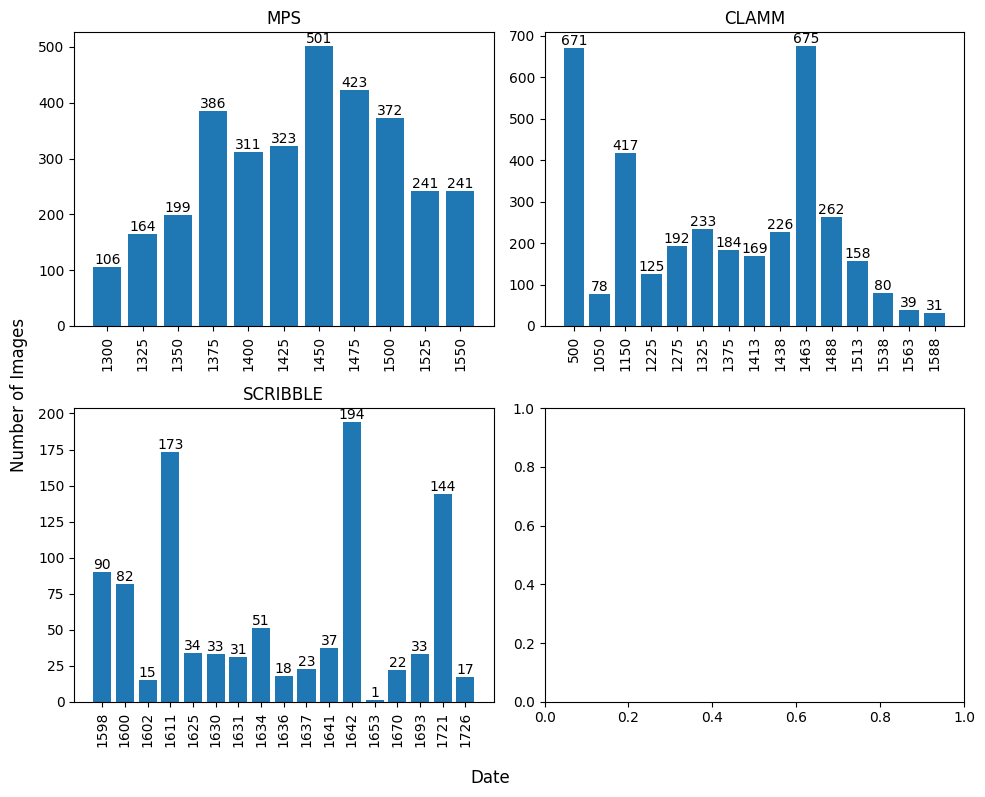

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, dataset in enumerate(datasets):
    plot_frequency(axs[i // 2, i % 2], dataset.y, dataset.name)

fig.supylabel("Number of Images")
fig.supxlabel("Date")
fig.tight_layout()

In [5]:
for dataset in datasets:
    print(dataset.name)
    splitter = DatasetSplitter(dataset)
    for set_type in [SetType.TRAIN, SetType.VAL, SetType.TEST]:
        X, y = splitter.get_data(set_type)
        print(set_type, len(X))
    print("---")

MPS
SetType.TRAIN 1828
SetType.VAL 458
SetType.TEST 981
---
CLAMM
SetType.TRAIN 1982
SetType.VAL 496
SetType.TEST 1062
---
SCRIBBLE
Removed 1 sample(s). Hist: {1653.0: 1}
SetType.TRAIN 557
SetType.VAL 140
SetType.TEST 300
---


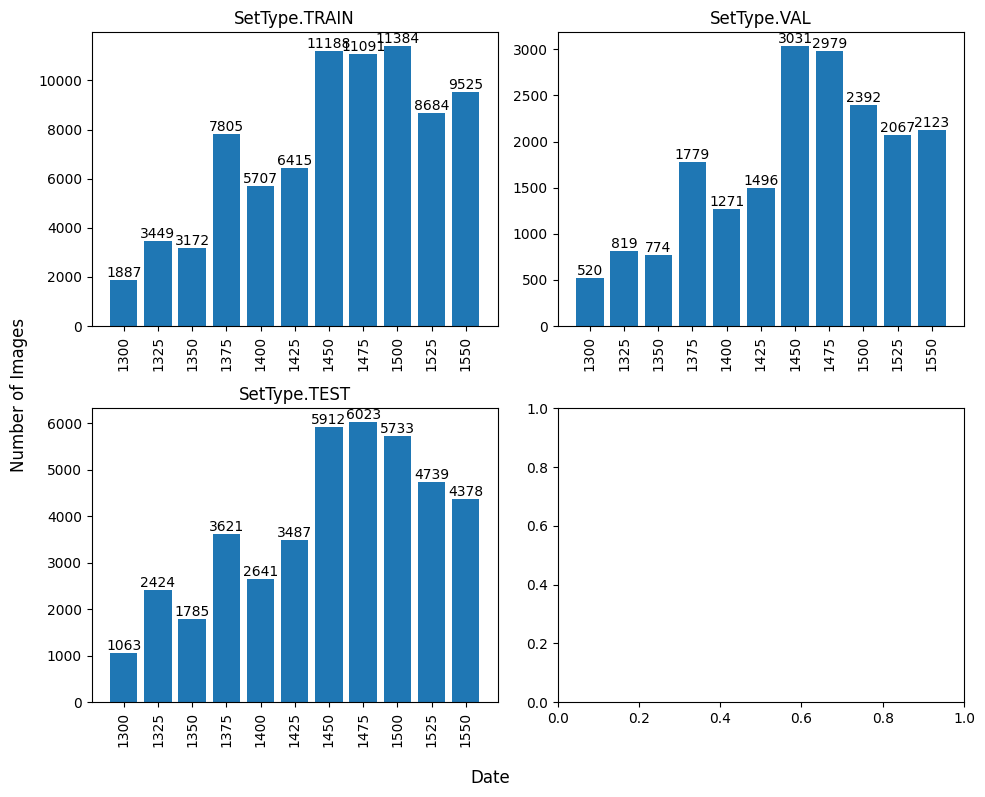

In [17]:
preprocessor = Preprocessor(DatasetName.MPS)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, set_type in enumerate([SetType.TRAIN, SetType.VAL, SetType.TEST]):
    X, y = preprocessor.read_preprocessing_header(set_type)
    plot_frequency(axs[i // 2, i % 2], y, set_type)

fig.supylabel("Number of Images")
fig.supxlabel("Date")
fig.tight_layout()